In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
pokemons = pd.read_csv('Pokemon.csv')

In [9]:
pokemons.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


***Назовите топ-3 самых частых типов покемонов (Type 1) и топ-3 самых редких типов покемонов (Type 1)***

In [15]:
pokemon_counts = pokemons['Type 1'].value_counts()

In [23]:
# cамые частые покемоны
top_common = pokemon_counts.head(3)
top_common

Type 1
Water     112
Normal     98
Grass      70
Name: count, dtype: int64

In [27]:
# cамые редкие покемоны
top_rare = pokemon_counts.tail(3)
top_rare

Type 1
Ice       24
Fairy     17
Flying     4
Name: count, dtype: int64

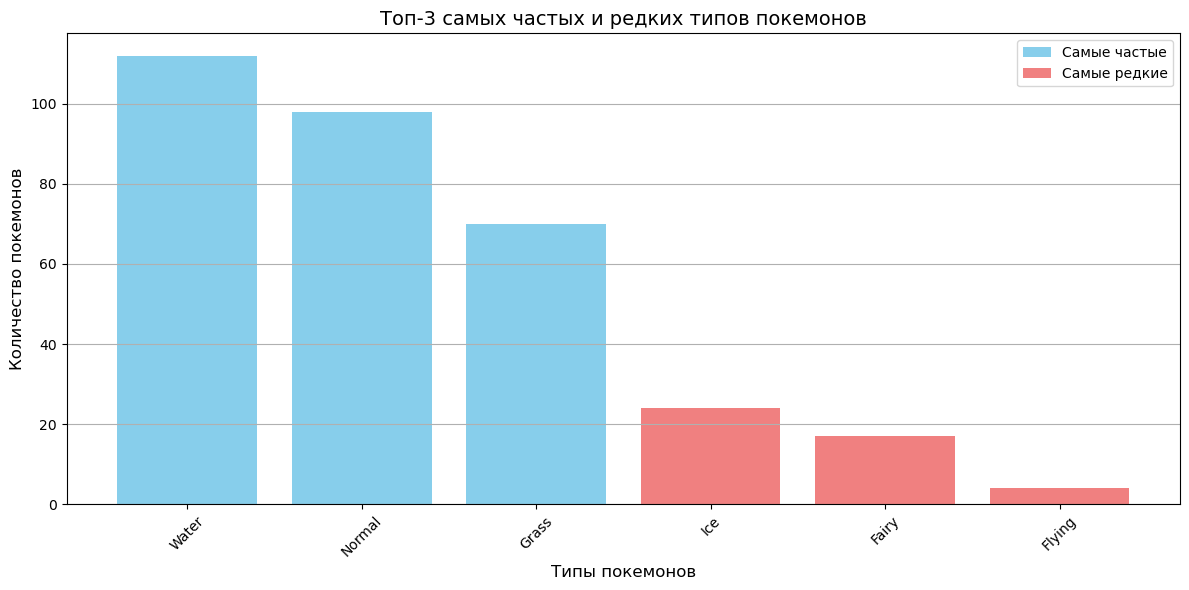

In [51]:
plt.figure(figsize=(12, 6))
bar_common = plt.bar(top_common.index, top_common.values, color='skyblue', label='Самые частые')
bar_rate = plt.bar(top_rate.index, top_rare.values, color='lightcoral', label='Самые редкие')
plt.legend()

plt.title('Топ-3 самых частых и редких типов покемонов', fontsize=14)
plt.xlabel('Типы покемонов', fontsize=12)
plt.ylabel('Количество покемонов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=1)


plt.tight_layout() # оптимальное отображение графика
plt.show()

In [70]:
most_common_pokemons_df = pokemons[pokemons['Type 1'].isin(top_common.index)]
most_common_pokemons_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False
741,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False
744,676,Furfrou,Normal,NaN,472,75,80,60,65,90,102,6,False
762,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False


In [76]:
most_rare_pokemons_df = pokemons[pokemons['Type 1'].isin(top_rare.index)]
most_rare_pokemons_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False
133,124,Jynx,Ice,Psychic,455,65,50,35,115,95,95,1,False
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
187,173,Cleffa,Fairy,NaN,218,50,25,28,45,55,15,2,False


***Что можно сказать про зависимость между общей силой покемона (Total) и статусом «Легендарный» (Legendary) у покемонов с типом из первой тройки предыдущего задания (топ-3 самых частых типов покемонов (Type 1))?***


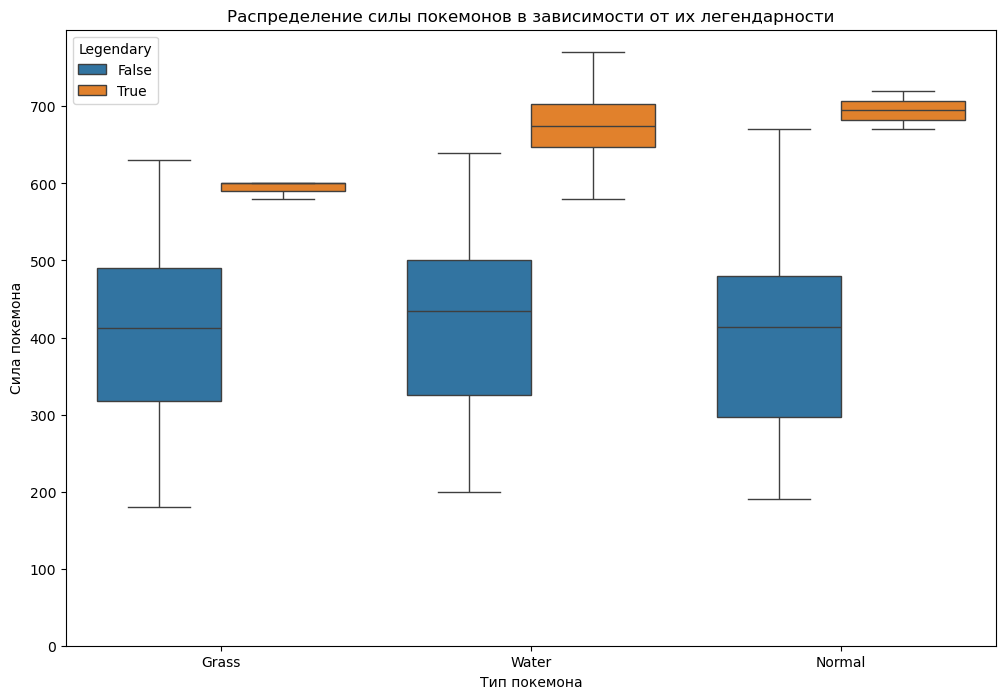

In [105]:
plt.figure(figsize=(12,8))
# ящик с усами для сравнения легендарных и нелегендарных покемонов
sns.boxplot(data=most_common_pokemons_df, x='Type 1', y='Total', hue='Legendary',)
plt.title('Распределение силы покемонов в зависимости от их легендарности')
plt.xlabel('Тип покемона')
plt.ylabel('Сила покемона')
plt.ylim(0)
plt.show()

**По графику разница заметна. Подтвердим ее также с помощью t-test - а.**

In [99]:
legend_most_common_pokemons_df = most_common_pokemons_df[most_common_pokemons_df['Legendary'] == True]
legend_most_common_pokemons_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
543,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True


In [97]:
not_legend_most_common_pokemons_df = most_common_pokemons_df[~(most_common_pokemons_df['Legendary'] == True)]
not_legend_most_common_pokemons_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [117]:
# 1. Проверим нормальность распределения выборок
_, p_legendary = stats.normaltest(legend_most_common_pokemons_df['Total'])
_, p_not_legendary = stats.normaltest(not_legend_most_common_pokemons_df['Total'])

print(f"pvalue для легендарных {p_legendary}")
print(f"pvalue для нелегендарных {p_not_legendary}")
# pvalue > 0.05 -> нет возможности отклонить нулевую гипотезу о нормальном распределении

pvalue для легендарных 0.6926770907544544
pvalue для нелегендарных 8.531351113109492e-06


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


Как видим, в случе нелегендарных покемонов распределение ненормально. Тогда используем не t-test, а Манна-Уитни.

In [123]:
man_whit_stat, p_value = stats.mannwhitneyu(legend_most_common_pokemons_df['Total'], not_legend_most_common_pokemons_df['Total'], alternative='two-sided')
alpha = 0.05

if p_value >= 0.05:
    print(f'Разницы в силе между легендарными и нелегендарными покемонами нет, pvalue = {p_value}')
else:
    print(f'Между легендарными и нелегендарными покемонами есть разница в силе, pvalue = {p_value}')

Между легендарными и нелегендарными покемонами есть разница в силе, pvalue = 8.588968439338497e-07


***На основании данных (Total, Legendary) из предыдущего пункта определите среднестатистическую общую силу легендарных и обычных покемонов, выделите по одному самому сильному и слабому покемону (Total) среди этих двух групп (Legendary)***

In [125]:
# 1. Среднестатистическая общая сила легендарных покемонов
legend_most_common_pokemons_df['Total'].mean()

652.2222222222222

In [127]:
# 2. Среднестатистическая общая сила нелегендарных покемонов
not_legend_most_common_pokemons_df['Total'].mean()

410.28044280442805

In [141]:
# 3. Самый сильный легендарный покемон
legend_most_common_pokemons_df[legend_most_common_pokemons_df['Total'] == legend_most_common_pokemons_df['Total'].max()][['#','Name']]

,#,Name
422,382,KyogrePrimal Kyogre


In [143]:
# 4. Самый слабый легендарный покемон
legend_most_common_pokemons_df[legend_most_common_pokemons_df['Total'] == legend_most_common_pokemons_df['Total'].min()][['#','Name']]

,#,Name
264,245,Suicune
701,640,Virizion


In [149]:
# 5. Самый сильный нелегендарный покемон
not_legend_most_common_pokemons_df[not_legend_most_common_pokemons_df['Total'] == not_legend_most_common_pokemons_df['Total'].max()][['#', 'Name']]

,#,Name
313,289,Slaking


In [153]:
# 6. Самый слабый нелегендарный покемон
not_legend_most_common_pokemons_df[not_legend_most_common_pokemons_df['Total'] == not_legend_most_common_pokemons_df['Total'].min()][['#', 'Name']]

,#,Name
206,191,Sunkern
